# Kaggle's Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Modules for machine learning / Preprocessing and modeling
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from joblib import dump, load

In [2]:
# confirming if the datasets exist in the mentioned path
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\test.csv
../data\train.csv


In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

test_ids= test["PassengerId"]

### Analisis Exploratorio

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# show the data type of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# check if there are duplicate values in the dataset
train.duplicated().sum()

0

In [8]:
# Percentage of null/missing values in the train dataset
print("Percentage of the null/missing values in each column of the (training dataset) \n", round(train.isnull().sum() / train.shape[0] * 100))

Percentage of the null/missing values in each column of the (training dataset) 
 PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64


In [9]:
print("Percentage of the null/missing values in each column of the (testing dataset) \n", round(test.isnull().sum() / test.shape[0] * 100))

Percentage of the null/missing values in each column of the (testing dataset) 
 PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleanup

In [11]:
def cleanSets(data):
    # remove columns that don't provide much impact or have a lot of null values
    data = data.drop(["Ticket","Cabin","Name","PassengerId"], axis=1)
    
    columns = ["SibSp","Parch"]# I did not add the column (Age and Fare) because they were transformed to object type
    
    """
    la idea aca es que algunos de estos valores seran NaN y los convertiremos o
    reemplazamos los valores nulos en cada columna con la media
    """
    for col in columns:
        data[col].fillna(data[col].mean, inplace=True)
    
    # where they got on the ship C = Cherbourg, Q = Queenstown, S = Southampton
    # we will fill the null values with (U) "unknown"
    data.Embarked.fillna("U", inplace=True)
    
    # replace null values in age with the average age
    data["Age"].replace(np.nan, data["Age"].mean(), inplace=True)
    
    # return the result
    return data

train = cleanSets(train)
test = cleanSets(test)

In [12]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
# I will convert the data of the columns (Sex and Embarked) to integer values to facilitate the learning of the model
# label encoder
le = preprocessing.LabelEncoder()

columns = ["Sex", "Embarked"]

for col in columns:
    # female:0 male:1
    # C:0 Q:1 S:2 U:3
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    
    # lets you see exactly how it converted to integer values
    print(le.classes_)

['female' 'male']
['C' 'Q' 'S']


In [14]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [15]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [16]:
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
test.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [18]:
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [19]:
test["Fare"].replace(np.nan, test["Fare"].mean(), inplace=True)

In [20]:
sns.set_style("dark")

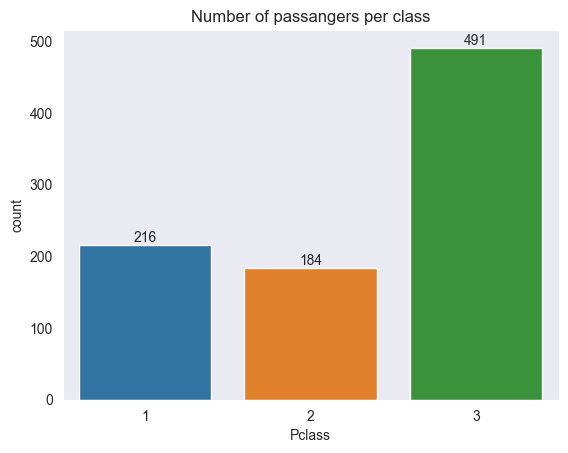

In [21]:
# Number of passengers by class
# 1 = 1st/Upper , 2 = 2nd/Middle, 3 = 3rd/Lower
ax= sns.countplot(x="Pclass", data= train)
ax.bar_label(ax.containers[0])
plt.title("Number of passangers per class")
plt.show()

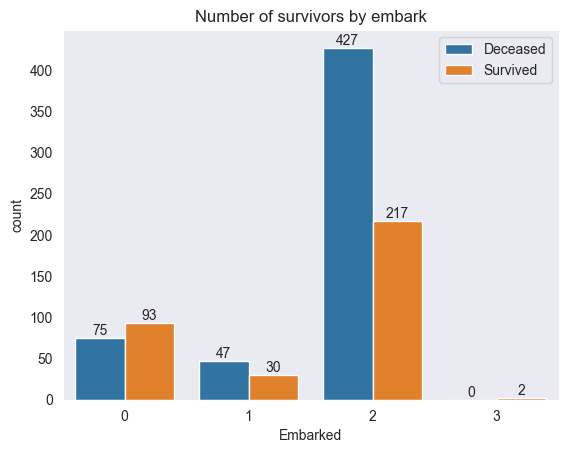

In [22]:
# Number of passengers for your boat
# C = Cherbourg, Q = Queenstown, S = Southampton
# 0 = No, 1 = Yes
ax= sns.countplot(x="Embarked", hue="Survived", data= train)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Number of survivors by embark")
plt.legend(labels=['Deceased', 'Survived'])
plt.show()

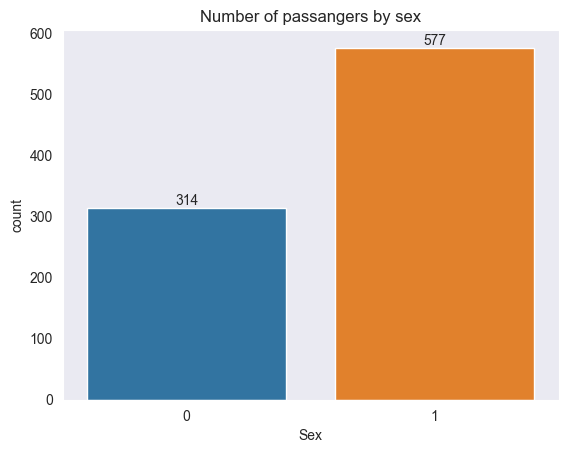

In [23]:
# Number of passengers by gender
ax= sns.countplot(x="Sex", data= train)
ax.bar_label(ax.containers[0])
plt.title("Number of passangers by sex")
plt.show()

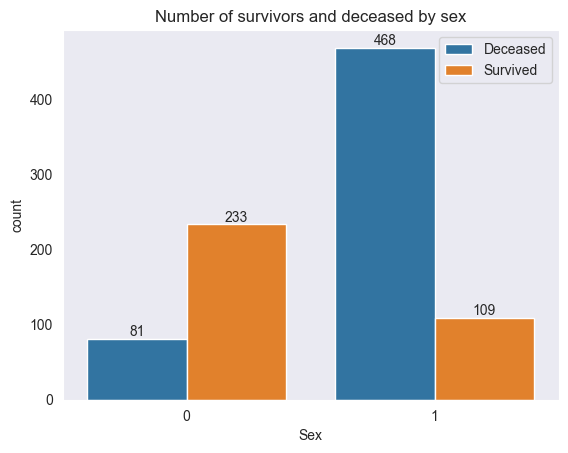

In [24]:
# number of passengers who survived and died by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Number of survivors and deceased by sex")
plt.legend(labels=['Deceased', 'Survived'])
plt.show()

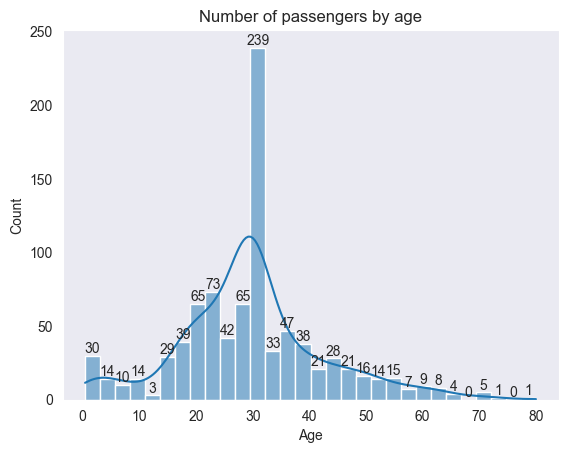

In [25]:
ax= sns.histplot(train["Age"], kde=True, bins=30)
ax.bar_label(ax.containers[1])
plt.title("Number of passengers by age")
plt.show()

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


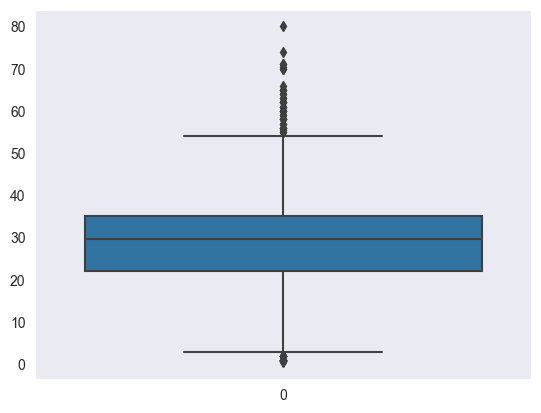

In [27]:
sns.boxplot(train.Age)
plt.show()

In [28]:
train["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

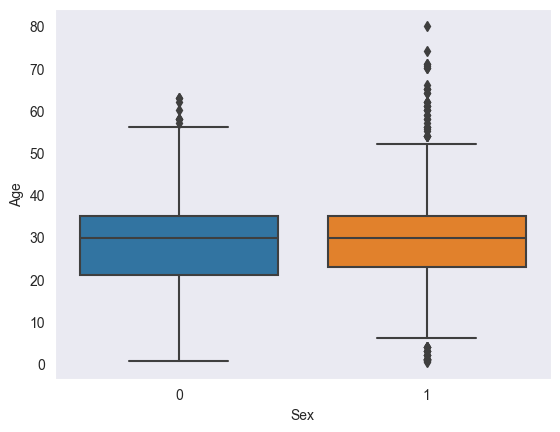

In [29]:
sns.boxplot(x=train["Sex"], y=train["Age"])
plt.show()

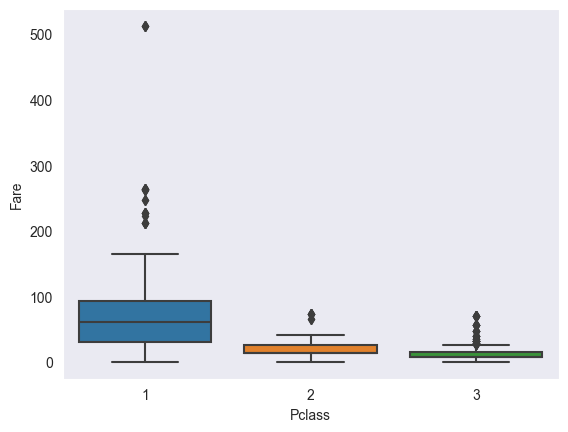

In [30]:
sns.boxplot(x=train["Pclass"], y=train["Fare"])
plt.show()

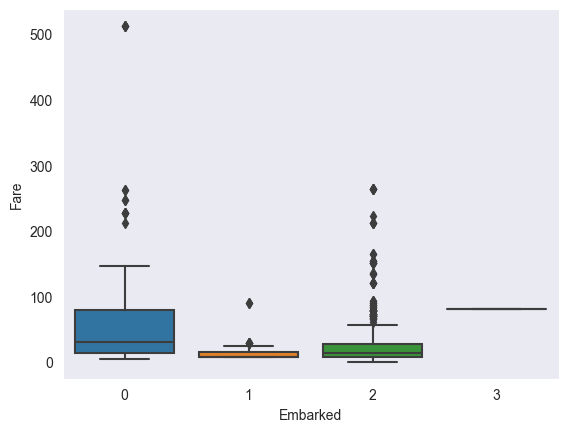

In [31]:
sns.boxplot(x= train["Embarked"], y= train["Fare"])
plt.show()

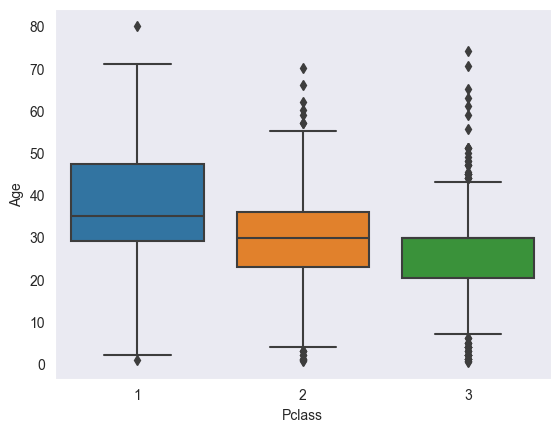

In [32]:
sns.boxplot(x= train["Pclass"], y= train["Age"])
plt.show()

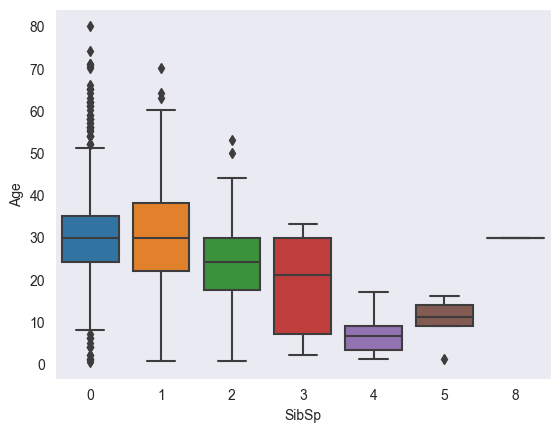

In [33]:
sns.boxplot(x= train["SibSp"], y= train["Age"])
plt.show()

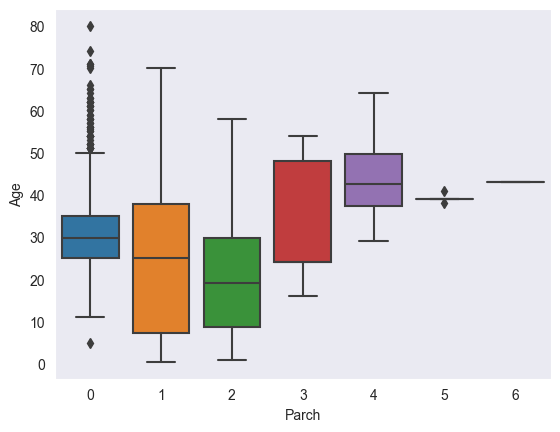

In [34]:
sns.boxplot(x= train["Parch"], y= train["Age"])
plt.show()

In [35]:
# Show the correlation between each variable
corr= train.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<AxesSubplot: >

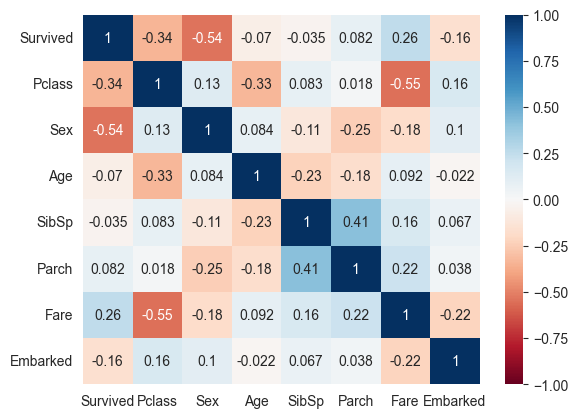

In [36]:
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

### Logistic regression model

I will use this model since it is more accurate than linear regression.

In [37]:
# set validation to see how good the model is

y = train["Survived"] # target
X = train.drop("Survived", axis= 1) # take the rest of the columns but drop the target column for the input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# create a classifier and train the model
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)

In [39]:
# since we train the model we want to know how good it is on the validation data it hasn't seen
predictions = clf.predict(X_test)

# We evaluate the precision of the model
print(f"The model had a precision of: {accuracy_score(y_test, predictions)} during the training")

The model had a precision of: 0.7988826815642458 during the training


In [40]:
# confusion matrix of the training data
train_cm = confusion_matrix(y_test, predictions, labels=[0,1])
print("Testing set confusion matrix: \n",train_cm)

Testing set confusion matrix: 
 [[92 18]
 [18 51]]


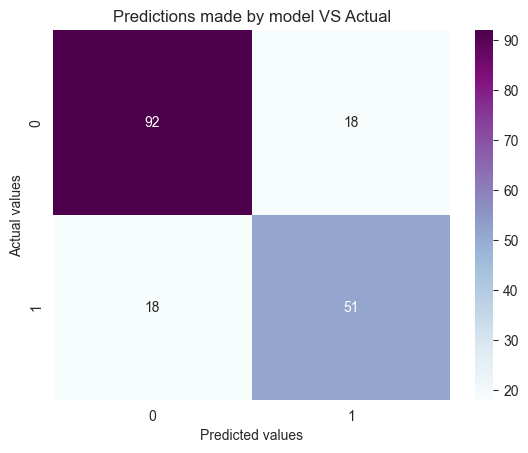

In [41]:
sns.heatmap(train_cm, cmap="BuPu", annot=True)
plt.title("Predictions made by model VS Actual")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [42]:
# dump(clf, "titanic-ml-model.joblib")

In [43]:
# Probamos el modelo con el (test set)
submit_predictions = clf.predict(test)
submit_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
# create the submission file in csv format
df = pd.DataFrame({"PassengerId":test_ids.values, "Survived": submit_predictions})

In [45]:
df.to_csv("Submission.csv", index=False)